In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
import numpy as np

In [3]:
# CSVs from Resources Folder
file_one = "Resources\Data1.csv"
file_two = "Resources\Data2.csv"

In [4]:
# Reading Data from CSV files
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [5]:
#  Data frames
file_one_df["DATE"]=file_two_df["DATE"]
file_one_df.head()


,Temperature,Revenue,DATE
0,24.566884,534.799028,01/01/1972
1,26.005191,625.190122,01/02/1972
2,27.790554,660.632289,01/03/1972
3,20.595335,487.706960,01/04/1972
4,11.503498,316.240194,01/05/1972


In [7]:
file_one_df["value"]=file_two_df["value"]
file_one_df.head()

,Temperature,Revenue,DATE,value
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [8]:
data=file_one_df

In [9]:
#Renaming Columns
final_data=data.rename(columns={"DATE": "Date", "value": "Consumption"})

In [10]:
final_data.head()

,Temperature,Revenue,Date,Consumption
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [11]:
min_rev=data['Revenue'].min()
min_rev

10.0

In [12]:
max_rev=data['Revenue'].max()
max_rev

1000.0

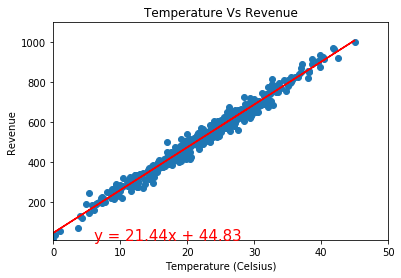

In [13]:
# Add the linear regression equation and line to plot fot Temperature and Revenue
x_axis=final_data.Temperature
y_axis=final_data.Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Revenue")
plt.title("Temperature Vs Revenue")
plt.xlim(0,50)
plt.ylim(10,1100)
plt.show()

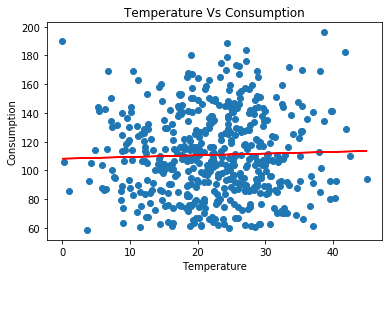

In [14]:
# Add the linear regression equation and line to plot fot Temperature and Consumption
x_axis=final_data.Temperature
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature")
plt.ylabel("Consumption")
plt.title("Temperature Vs Consumption")
plt.show()

In [15]:
final_data['Month']=final_data['Date'].str.split('/').str[1].astype(int)
final_data.head()

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5


In [16]:
final_data.head()

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5


([<matplotlib.axis.XTick at 0x2228a81ae88>,
 <a list of 13 Text xticklabel objects>)

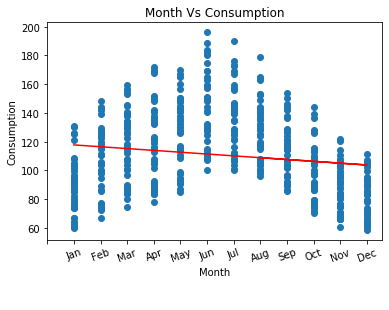

In [17]:
# Add the linear regression equation and line to plot for Month and Consumption
x_axis=final_data.Month
y_axis=final_data.Consumption
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Month")
plt.ylabel("Consumption")
plt.title("Month Vs Consumption")
plt.xticks(np.arange(13),("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"), rotation=20)


In [18]:
final_data['Consumption'].value_counts()

61.9418     1
129.8794    1
125.5563    1
95.3665     1
116.2802    1
           ..
61.0653     1
182.6261    1
100.0984    1
91.2895     1
101.3750    1
Name: Consumption, Length: 500, dtype: int64

Random Forest Regression
------------------------------------------

In [19]:
# data preview
final_data.head(10)

,Temperature,Revenue,Date,Consumption,Month
0,24.566884,534.799028,01/01/1972,59.9622,1
1,26.005191,625.190122,01/02/1972,67.0605,2
2,27.790554,660.632289,01/03/1972,74.2350,3
3,20.595335,487.706960,01/04/1972,78.1120,4
4,11.503498,316.240194,01/05/1972,84.7636,5
5,14.352514,367.940744,01/06/1972,100.5960,6
6,13.707780,308.894518,01/07/1972,100.1263,7
7,30.833985,696.716640,01/08/1972,96.3607,8
8,0.976870,55.390338,01/09/1972,85.8007,9
9,31.669465,737.800824,01/10/1972,70.3934,10


In [20]:
# Assigning X and y values
X = final_data['Temperature'].values
y = final_data['Revenue'].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [23]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\shweta shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [24]:
# Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([223.32458237, 253.63014048, 411.1961093 , 519.21437616,
       618.60568605, 533.77379316, 640.07689223, 190.41147266,
       476.0035282 , 591.11267302, 529.81844608, 243.57252693,
       641.61403794, 461.11048811, 581.02661066, 417.35565252,
       354.71153466, 539.89608144, 668.77897706, 382.61818483,
       407.60870947, 572.43381561, 545.64411506, 572.32678778,
       461.37434319, 699.22767204, 767.66750094, 425.28679438,
       614.02307019, 406.17365699, 446.47547263, 887.15893622,
       446.47547263, 425.33788766, 908.45785888, 295.3679661 ,
       623.97865726, 499.56365629, 887.15893622, 750.80939184,
       297.01863542, 539.89608144, 887.15893622, 608.69693413,
       341.5843759 , 541.00580401, 588.65623162, 253.63014048,
       640.10076022, 567.30695454, 671.43326048, 355.08000617,
       541.88792291, 494.96294223, 451.78498692, 869.2668361 ,
       547.93439104, 589.53340411, 475.24666208, 871.76064116,
       529.72788094, 312.4620586 , 451.78498692, 869.26

In [25]:
# Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,241.278548,223.324582
1,273.073342,253.630140
2,441.508733,411.196109
3,571.764273,519.214376
4,640.177059,618.605686
...,...,...
245,401.433018,397.588040
246,456.524341,480.000658
247,278.418265,312.462059
248,325.968408,314.215070


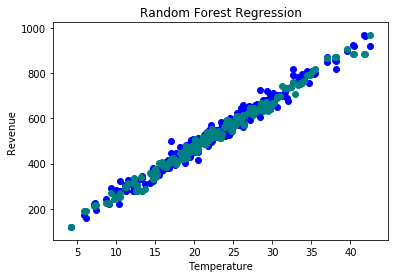

In [26]:
# Visualising the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'teal')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

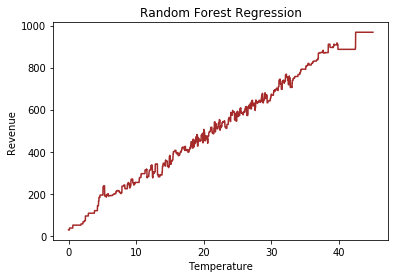

In [27]:
# Visualising the Random Forest Regression Results
plt.plot(X_grid, regressor.predict(X_grid), color = 'brown')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [28]:
# Predicting revenue at a given temperature
T = 20
Revenue = regressor.predict([[T]])
Revenue

array([506.03928859])